# EDA with Envioscreen data # 3

#### Marshall C

### Import data from API

In [1]:
import json
import urllib.request
url = 'https://data.ca.gov/api/3/action/datastore_search?resource_id=89b3f4e9-0bf8-4690-8c6f-715a717f3fae&limit=5&q=title:jones'  
fileobj = urllib.request.urlopen(url)
response_dict = json.loads(fileobj.read())
print(response_dict)

{'help': 'https://data.ca.gov/api/3/action/help_show?name=datastore_search', 'success': True, 'result': {'include_total': True, 'resource_id': '89b3f4e9-0bf8-4690-8c6f-715a717f3fae', 'fields': [{'type': 'int', 'id': '_id'}, {'type': 'text', 'id': 'Census Tract'}, {'type': 'text', 'id': 'Total Population'}, {'type': 'text', 'id': 'California County'}, {'type': 'text', 'id': 'ZIP'}, {'type': 'text', 'id': 'Nearby City \n(to help approximate location only)'}, {'type': 'text', 'id': 'Longitude'}, {'type': 'text', 'id': 'Latitude'}, {'type': 'text', 'id': 'CES 3.0 Score'}, {'type': 'text', 'id': 'CES 3.0 Percentile'}, {'type': 'text', 'id': 'CES 3.0 \nPercentile Range'}, {'type': 'text', 'id': 'SB 535 Disadvantaged Community'}, {'type': 'text', 'id': 'Ozone'}, {'type': 'text', 'id': 'Ozone Pctl'}, {'type': 'text', 'id': 'PM2.5'}, {'type': 'text', 'id': 'PM2.5 Pctl'}, {'type': 'text', 'id': 'Diesel PM'}, {'type': 'text', 'id': 'Diesel PM Pctl'}, {'type': 'text', 'id': 'Drinking Water'}, {'ty

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read in just the EnviroScreen #3 data

In [3]:
cal = pd.read_csv('https://data.ca.gov/dataset/0bd5f40b-c59b-4183-be22-d057eae8383c/resource/89b3f4e9-0bf8-4690-8c6f-715a717f3fae/download/calenviroscreen-3.0-results-june-2018-update.csv')

In [4]:
cal.head()

,Census Tract,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,3174,Fresno,93706,Fresno,-119.781696,36.709695,94.09,100.00,95-100% (highest scores),...,77.51,76.3,97.12,17.6,91.72,26.0,79.40,92.12,9.55,99.70
1,6071001600,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,90.68,99.99,95-100% (highest scores),...,96.25,72.5,94.63,12.3,71.82,34.1,93.75,87.44,9.07,98.11
2,6019000200,3167,Fresno,93706,Fresno,-119.805504,36.735491,85.97,99.97,95-100% (highest scores),...,78.39,86.8,99.56,16.1,87.98,40.1,97.85,94.58,9.81,99.99
3,6077000801,6692,San Joaquin,95203,Stockton,-121.314524,37.940517,82.49,99.96,95-100% (highest scores),...,75.14,61.3,85.57,19.6,94.97,21.1,63.54,86.70,8.99,97.72
4,6019001500,2206,Fresno,93725,Fresno,-119.717843,36.681600,82.03,99.95,95-100% (highest scores),...,73.72,66.4,90.23,18.6,93.65,28.1,83.98,80.08,8.30,92.76


In [4]:
cal.isnull().sum()

Census Tract                                           0
Total Population                                       0
California County                                      0
ZIP                                                    0
Nearby City \n(to help approximate location only)      0
Longitude                                              0
Latitude                                               0
CES 3.0 Score                                        106
 CES 3.0 Percentile                                  106
CES 3.0 \nPercentile Range                           106
SB 535 Disadvantaged Community                         0
Ozone                                                  0
Ozone Pctl                                             0
PM2.5                                                 19
PM2.5 Pctl                                            19
Diesel PM                                              0
Diesel PM Pctl                                         0
Drinking Water                 

In [5]:
cal.dtypes

Census Tract                                           int64
Total Population                                       int64
California County                                     object
ZIP                                                    int64
Nearby City \n(to help approximate location only)     object
Longitude                                            float64
Latitude                                             float64
CES 3.0 Score                                        float64
 CES 3.0 Percentile                                  float64
CES 3.0 \nPercentile Range                            object
SB 535 Disadvantaged Community                        object
Ozone                                                float64
Ozone Pctl                                           float64
PM2.5                                                float64
PM2.5 Pctl                                           float64
Diesel PM                                            float64
Diesel PM Pctl          

In [6]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 57 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Census Tract                                      8035 non-null   int64  
 1   Total Population                                  8035 non-null   int64  
 2   California County                                 8035 non-null   object 
 3   ZIP                                               8035 non-null   int64  
 4   Nearby City 
(to help approximate location only)  8035 non-null   object 
 5   Longitude                                         8035 non-null   float64
 6   Latitude                                          8035 non-null   float64
 7   CES 3.0 Score                                     7929 non-null   float64
 8    CES 3.0 Percentile                               7929 non-null   float64
 9   CES 3.0 
Percentile

In [7]:
#cal.fillna(0, inplace=True)

There are a few heavily populated outliers however most of the population divided up in this dataset is between 3-6k

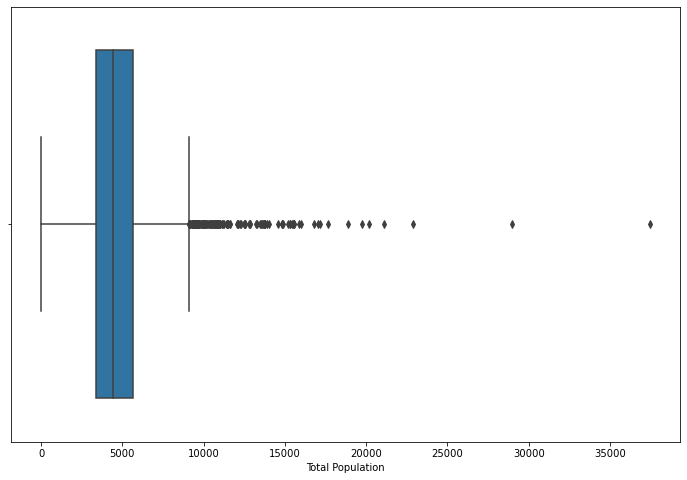

In [17]:
sns.boxplot(data = cal, x= 'Total Population')
plt.gcf().set_size_inches(12,8)

This graph is particularly interesting because it is not intuitive. More poverty usually results in less education, however I believe that since there are more people in poverty areas closer together it would result in more children who actively go to school.

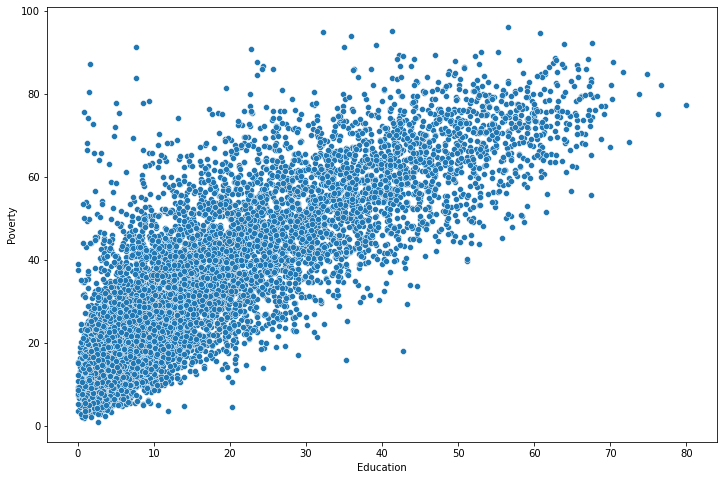

In [24]:
sns.scatterplot(x='Education', y = 'Poverty', data = cal)
plt.gcf().set_size_inches(12,8)

I am looking so heavily at SB 535 Disadvantaged Community because it is binary and also stands for a impoverished community. Which in turn allows me to have some inference into the poverty metric.

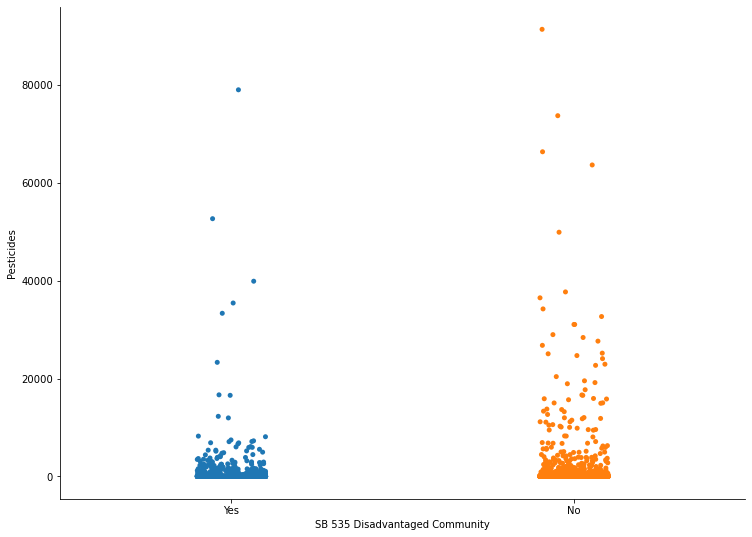

In [31]:
#sns.scatterplot(x= 'Total Population', y ='Pesticides', data = cal, hue="SB 535 Disadvantaged Community")
sns.catplot(y ='Pesticides', data = cal, x="SB 535 Disadvantaged Community")
plt.gcf().set_size_inches(12,8)

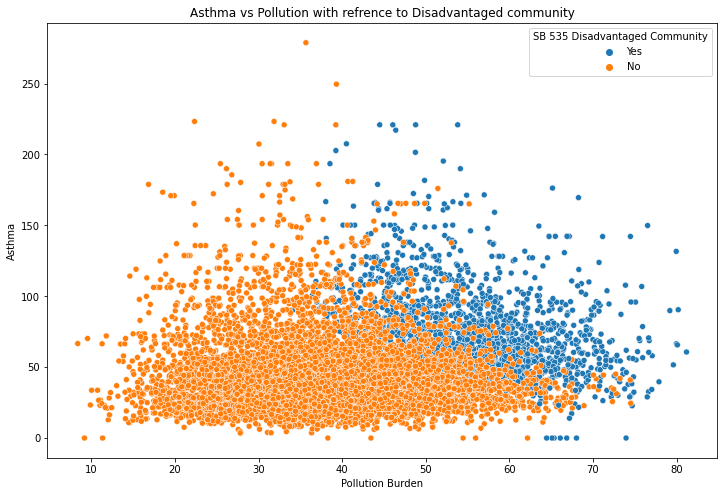

In [25]:
sns.scatterplot(x= 'Pollution Burden', y ='Asthma', data = cal, hue="SB 535 Disadvantaged Community")
plt.title('Asthma vs Pollution with refrence to Disadvantaged community')
plt.gcf().set_size_inches(12,8)

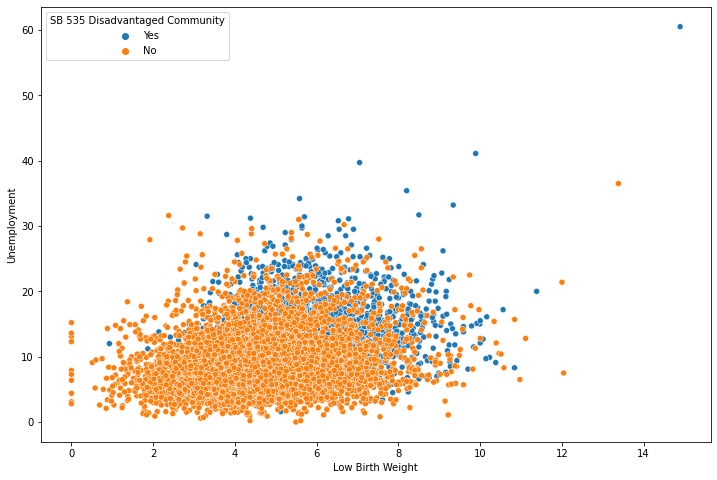

In [20]:
sns.scatterplot(x= 'Low Birth Weight', y ='Unemployment', data = cal, hue="SB 535 Disadvantaged Community")
plt.gcf().set_size_inches(12,8)

<AxesSubplot:xlabel='Total Population', ylabel='Cardiovascular Disease Pctl'>

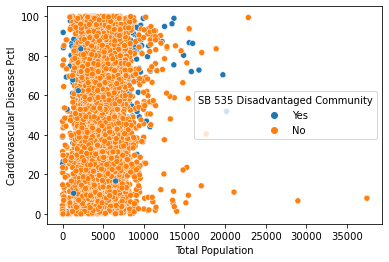

In [17]:
sns.scatterplot(x= 'Total Population', y ='Cardiovascular Disease Pctl', data = cal, hue="SB 535 Disadvantaged Community")

<AxesSubplot:xlabel='Total Population', ylabel='Solid Waste Pctl'>

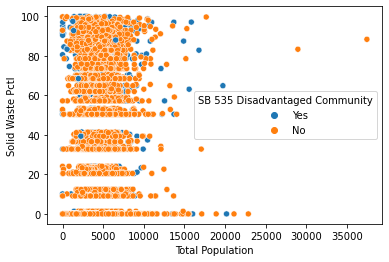

In [18]:
sns.scatterplot(x= 'Total Population', y ='Solid Waste Pctl', data = cal, hue="SB 535 Disadvantaged Community")

<AxesSubplot:xlabel='SB 535 Disadvantaged Community', ylabel='Cardiovascular Disease Pctl'>

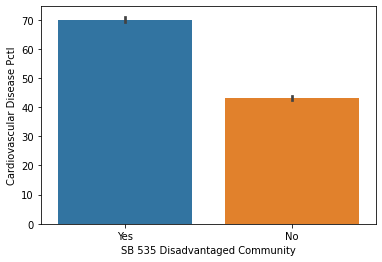

In [19]:
sns.barplot(y ='Cardiovascular Disease Pctl', data = cal, x="SB 535 Disadvantaged Community")

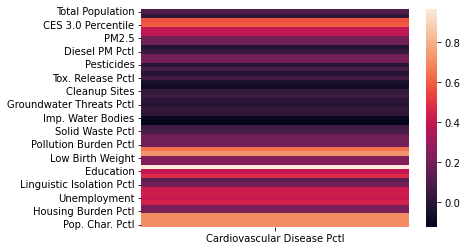

In [20]:
sns.heatmap(cal.corr()[['Cardiovascular Disease Pctl']].drop(['Cardiovascular Disease Pctl','Longitude','Census Tract','Latitude']))

plt.show()

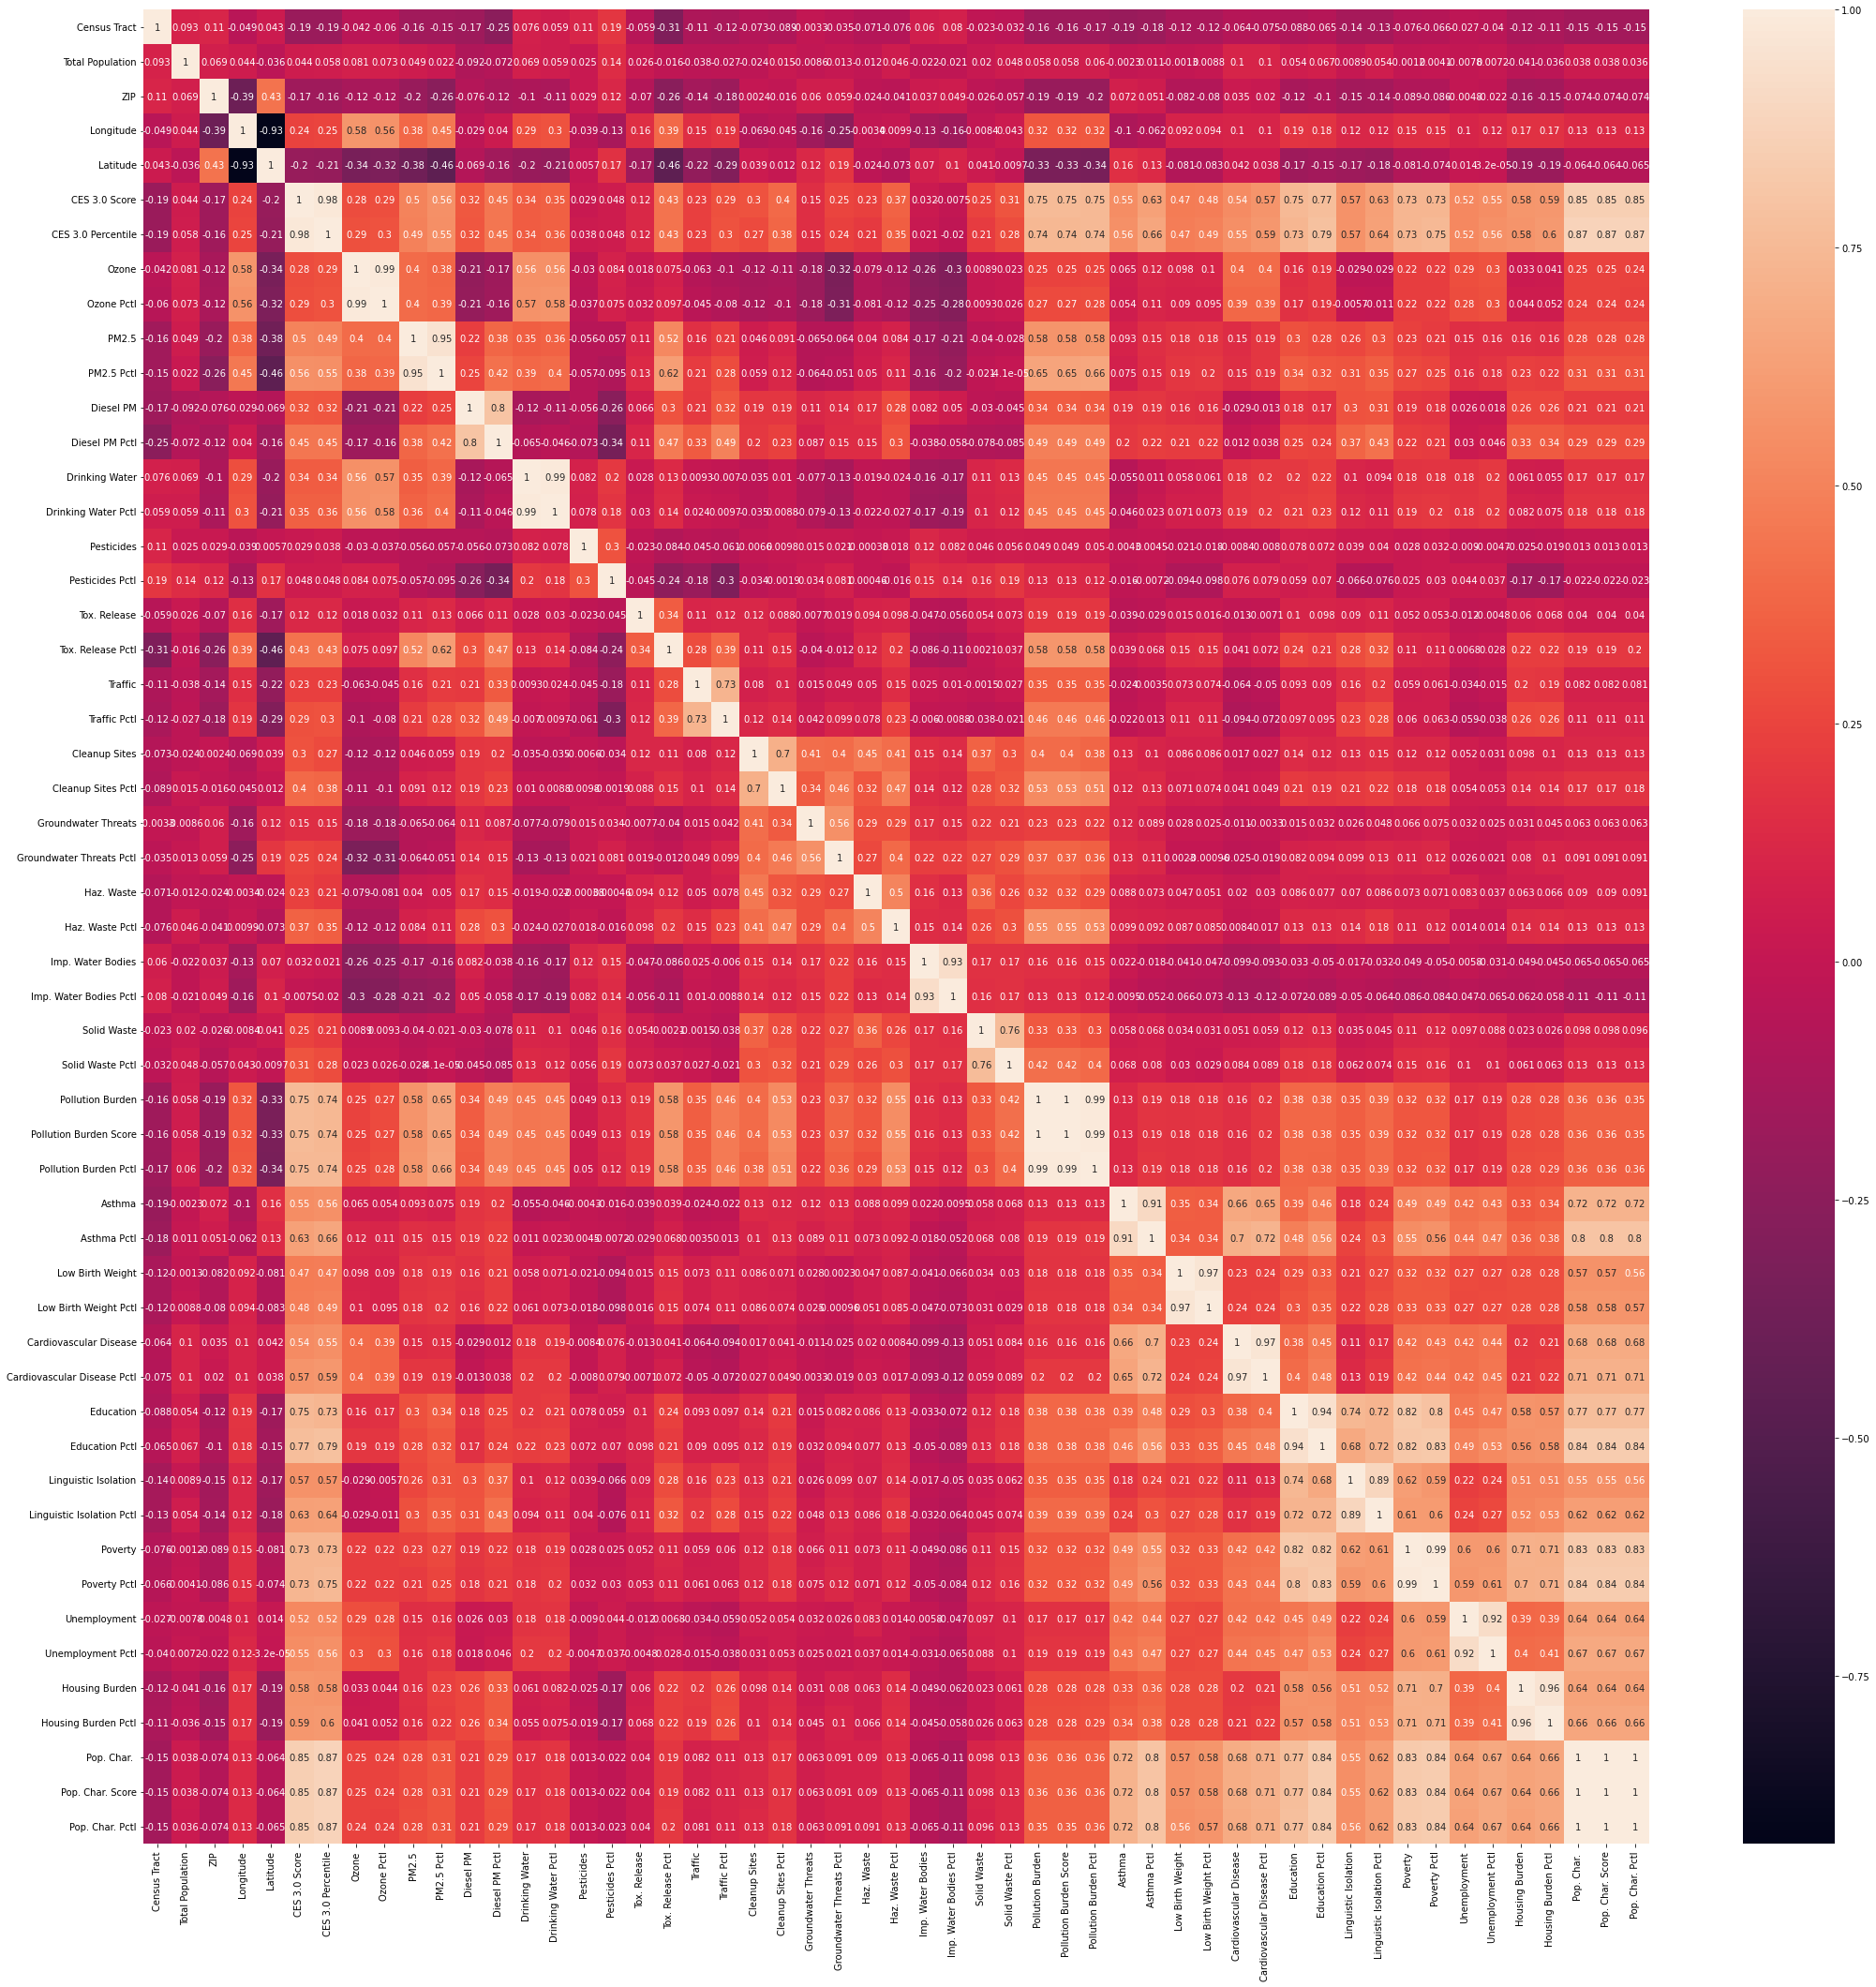

In [21]:
plt.subplots(1,1, figsize=(36,36))
sns.heatmap(cal.corr(), annot= True)
plt.show()

In [5]:
#### list highest correlated for use in pairplot below

<AxesSubplot:xlabel='Ozone', ylabel='Poverty'>

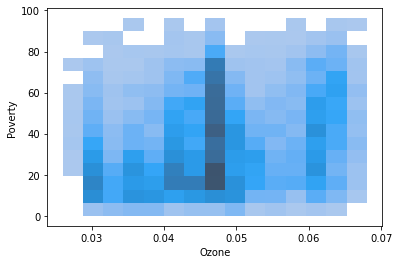

In [22]:
sns.histplot(data = cal, x = 'Ozone', y = 'Poverty', bins = 15, palette='rgb')

<AxesSubplot:xlabel='Ozone', ylabel='Asthma'>

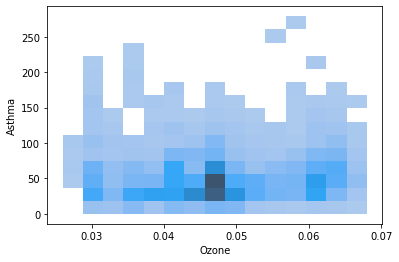

In [23]:
sns.histplot(data = cal, x = 'Ozone', y = 'Asthma', bins = 15, palette='rgb')

In [24]:
pct_missing = cal.isna().mean()
pct_missing

Census Tract                                         0.000000
Total Population                                     0.000000
California County                                    0.000000
ZIP                                                  0.000000
Nearby City \n(to help approximate location only)    0.000000
Longitude                                            0.000000
Latitude                                             0.000000
CES 3.0 Score                                        0.013192
 CES 3.0 Percentile                                  0.013192
CES 3.0 \nPercentile Range                           0.013192
SB 535 Disadvantaged Community                       0.000000
Ozone                                                0.000000
Ozone Pctl                                           0.000000
PM2.5                                                0.002365
PM2.5 Pctl                                           0.002365
Diesel PM                                            0.000000
Diesel P

## Pairplot with features to explore their interaction(Not the best graph)

In [6]:

exp = cal[['CES 3.0 Score', 'Education', 'Low Birth Weight', 'Pollution Burden', 'Traffic', 'Pesticides', 'Housing Burden',
           'Ozone', 'Asthma']]

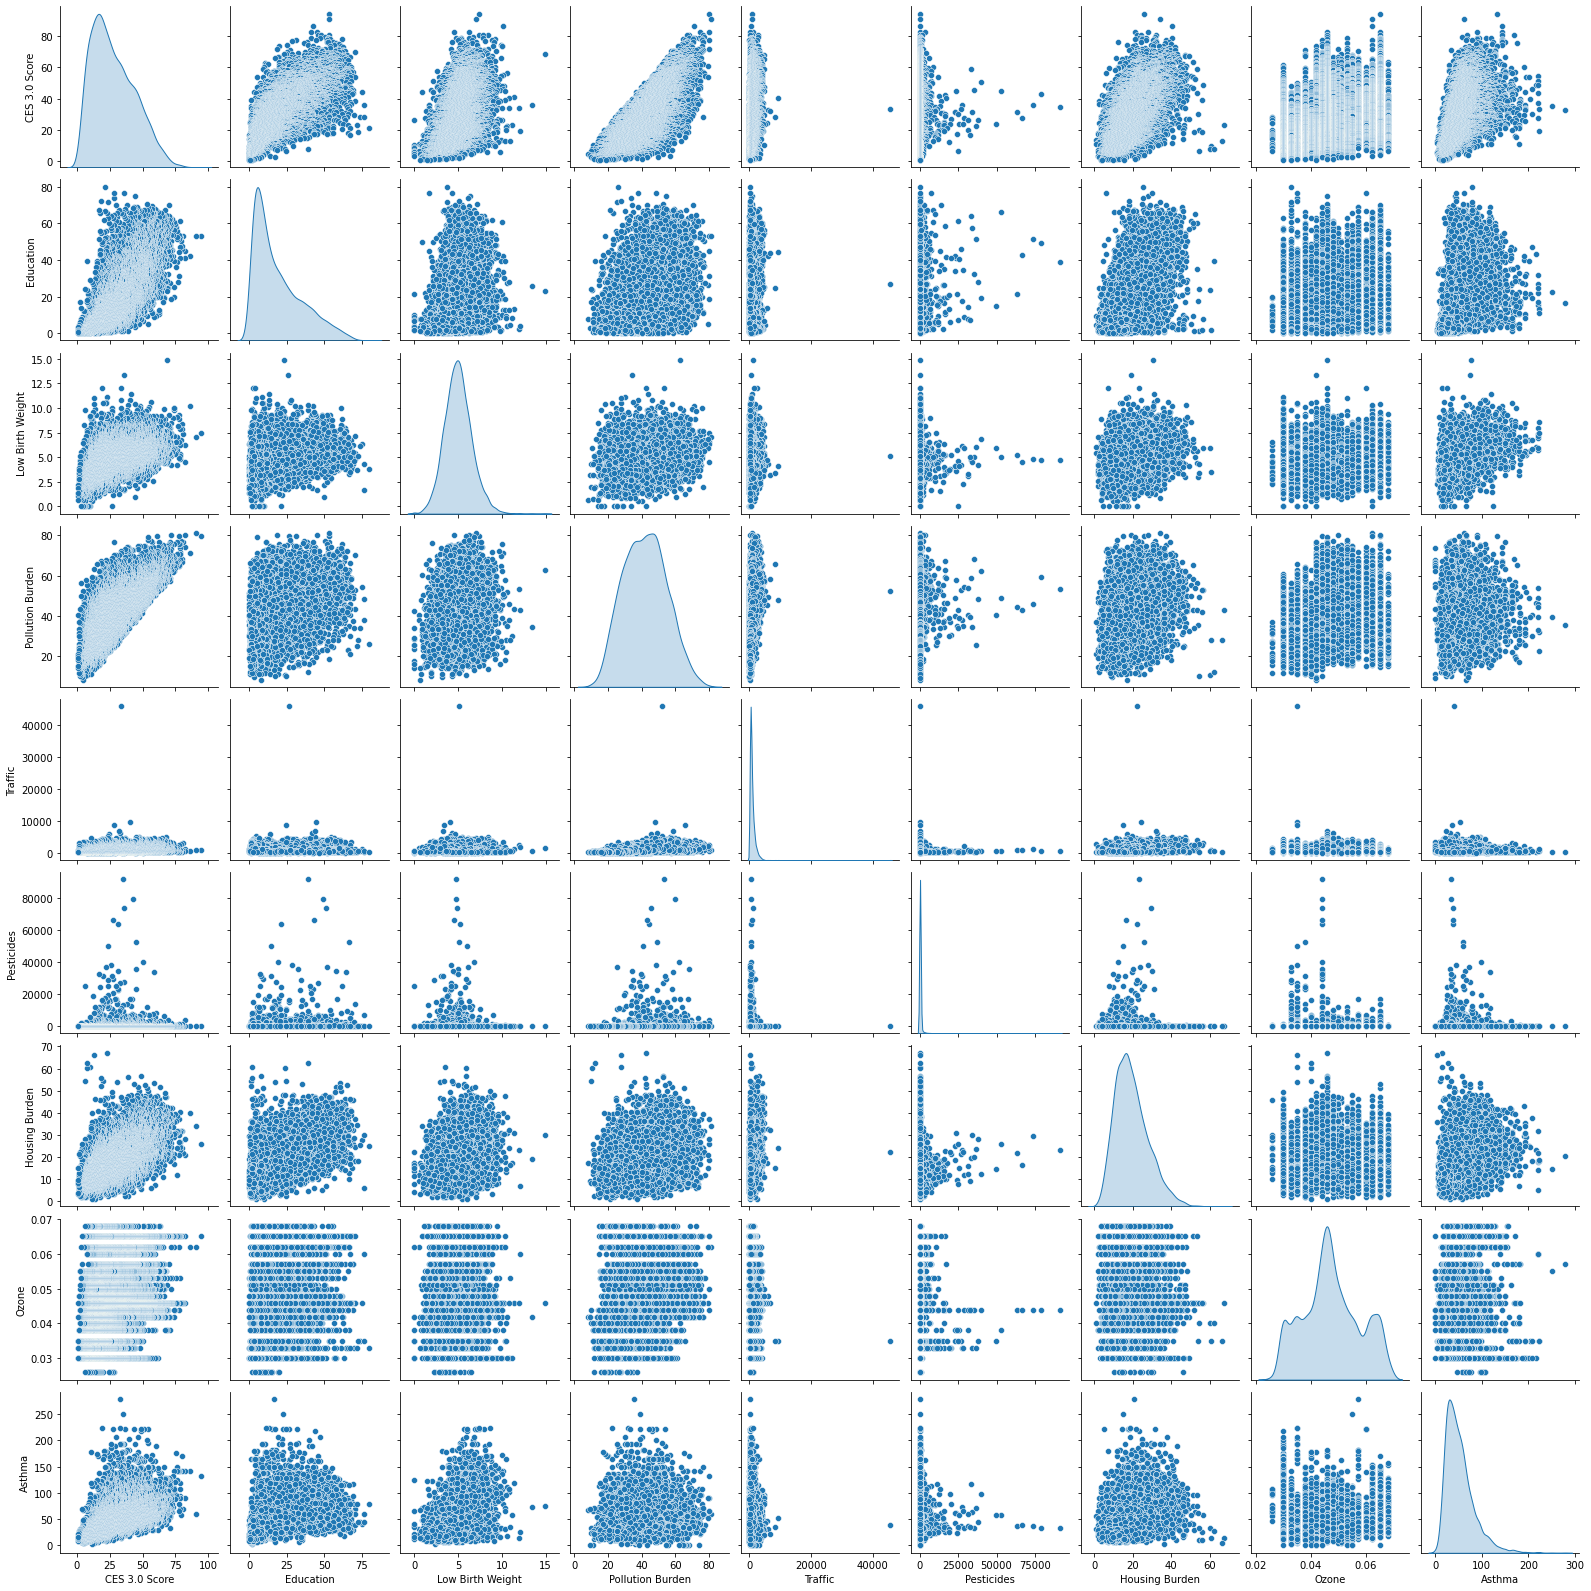

In [7]:
sns.pairplot(data=exp, diag_kind='kde')

### New pairplot with less features

In [11]:
corr2 = cal[['CES 3.0 Score', 'Education', 'Low Birth Weight', 'Housing Burden',
           'Ozone', 'Asthma']].corr()

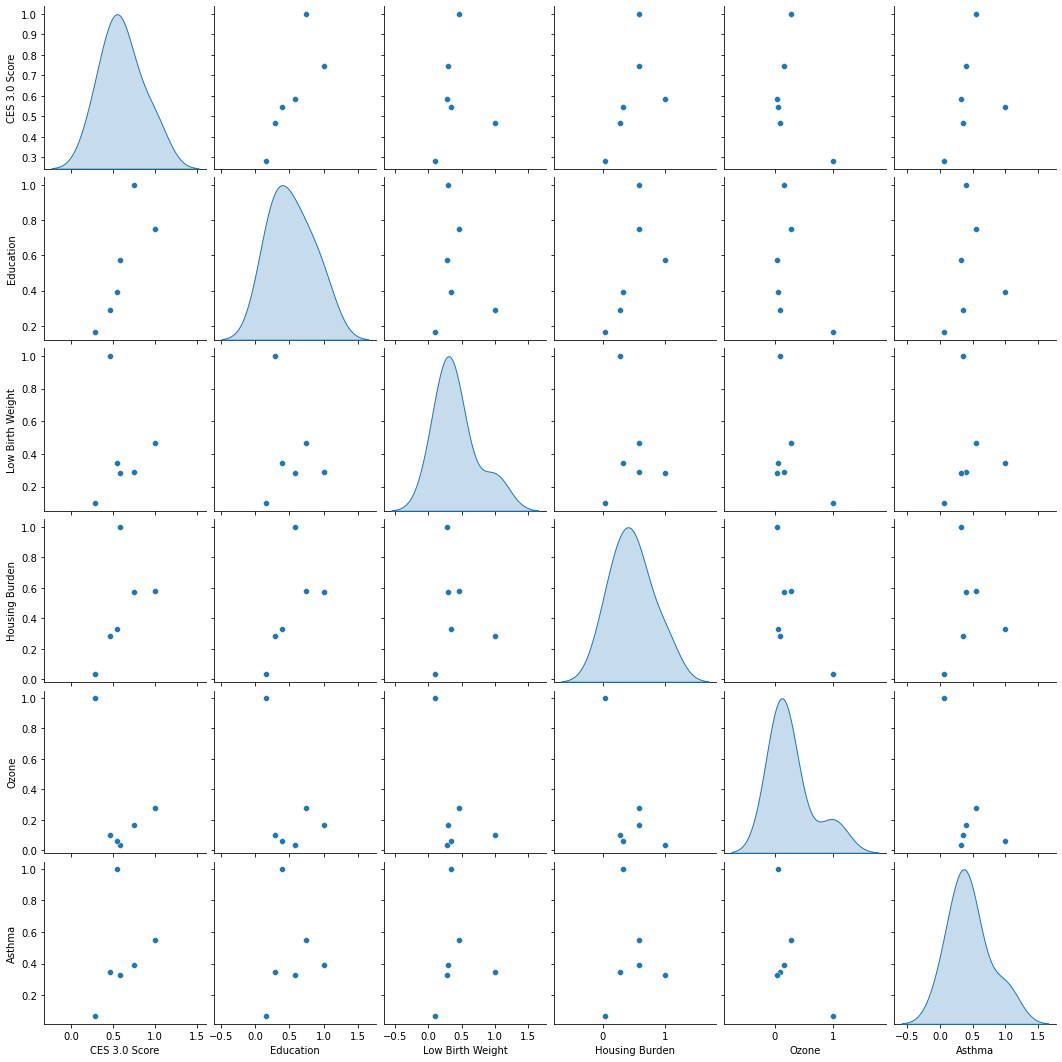

In [15]:
sns.pairplot(data=corr2, diag_kind='kde')

## Rudementary model with SVR

In [16]:
X = cal[['Total Population', 'Poverty', 'Education', 'Pollution Burden', 'Solid Waste', 
       'Haz. Waste', 'Traffic', 'Pesticides', 'Diesel PM', 'Ozone', 'SB 535 Disadvantaged Community']]
y = cal['Asthma Pctl']

In [18]:
X=pd.get_dummies(X)
X=X.fillna(X.median()) #fill with median value

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [20]:
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state= 42, test_size=.2)

In [74]:
from sklearn.svm import SVR

In [22]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [23]:
train_preds =  svr.predict(X_train)
test_preds= svr.predict(X_test)

In [24]:
print(f'Train error: {mean_squared_error(y_train,train_preds)}')
print(f'Test error: {mean_squared_error(y_test,test_preds)}')

svr.score(X_train,y_train)

Train error: 821.9403587982769
Test error: 840.5983562811261


0.012699720090386335

#### ^horrible score with selected features need to improve

In [25]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 57 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Census Tract                                      8035 non-null   int64  
 1   Total Population                                  8035 non-null   int64  
 2   California County                                 8035 non-null   object 
 3   ZIP                                               8035 non-null   int64  
 4   Nearby City 
(to help approximate location only)  8035 non-null   object 
 5   Longitude                                         8035 non-null   float64
 6   Latitude                                          8035 non-null   float64
 7   CES 3.0 Score                                     7929 non-null   float64
 8    CES 3.0 Percentile                               7929 non-null   float64
 9   CES 3.0 
Percentile

In [28]:
X = cal[['CES 3.0 Score', 'Low Birth Weight', 'Cardiovascular Disease', 'Education', 'Linguistic Isolation', 'Poverty', 'Unemployment', 'Housing Burden']]
y = cal['Asthma Pctl']

In [29]:
X=pd.get_dummies(X)
X=X.fillna(X.median())

In [30]:
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state= 42, test_size=.2)

In [31]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [32]:
train_preds =  svr.predict(X_train)
test_preds= svr.predict(X_test)

In [33]:
print(f'Train error: {mean_squared_error(y_train,train_preds)}')
print(f'Test error: {mean_squared_error(y_test,test_preds)}')

svr.score(X_train,y_train)

Train error: 352.37896448959117
Test error: 356.5166644680112


0.5767285952675592

#### ^Big improvement with selecting better features but still very bad.

## Lasso model regression try

In [5]:
X = cal[['CES 3.0 Score', 'Low Birth Weight', 'Cardiovascular Disease', 'Education', 'Linguistic Isolation', 'Poverty', 'Unemployment', 'Housing Burden']]
y = cal['Asthma Pctl']

In [6]:
X=pd.get_dummies(X)
X=X.fillna(X.median())

In [9]:
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state= 42, test_size=.2)

In [10]:
from sklearn.linear_model import Lasso

In [11]:
las = Lasso()
las.fit(X_train, y_train)

Lasso()

In [12]:
train_preds =  las.predict(X_train)
test_preds= las.predict(X_test)

In [13]:
print(f'Train error: {mean_squared_error(y_train,train_preds)}')
print(f'Test error: {mean_squared_error(y_test,test_preds)}')

las.score(X_train,y_train)

Train error: 334.47872655648945
Test error: 328.0866835713292


0.5982300457470547

## Ridge Model regression try

In [17]:
X = cal[['CES 3.0 Score', 'Low Birth Weight', 'Cardiovascular Disease', 'Education', 'Linguistic Isolation', 'Poverty', 'Unemployment', 'Housing Burden']]
y = cal['Asthma Pctl']

In [18]:
X=pd.get_dummies(X)
X=X.fillna(X.median())

In [19]:
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state= 42, test_size=.2)

In [31]:
from sklearn.linear_model import Ridge

In [23]:
rid = Ridge()
rid.fit(X_train, y_train)

Ridge()

In [25]:
train_preds =  rid.predict(X_train)
test_preds= rid.predict(X_test)

In [26]:
print(f'Train error: {mean_squared_error(y_train,train_preds)}')
print(f'Test error: {mean_squared_error(y_test,test_preds)}')

rid.score(X_train,y_train)

Train error: 333.792290399288
Test error: 326.26871194297405


0.5990545807670116

# Merging all Cal Enviroscreen datasets into one dataset with intersect

In [5]:
# cal is enviroscreen 3
cal['origin']= '2018 update'
cal2 = pd.read_csv('../../raw_data/calenviroscreen2-final-report.csv')
cal2['origin']='2014 update'


In [6]:
cal4 = pd.read_excel('../../raw_data/calenviroscreen40resultsdatadictionary_F_2021.xlsx')
cal4['origin']= '2021 update'

In [7]:
cal1 = pd.read_excel('../../raw_data/calenviroscreendatav11.xls')
cal1['origin']= '2013 update'

In [17]:
len(cal1.columns)

43

In [18]:
len(cal.columns)

58

In [19]:
len(cal2.columns)

53

In [20]:
len(cal4.columns)

59

#### ^tons of uneven column types within the Enviroscreen 1-4 dataset

##### I wanted to intersect on shared columns to create the cleanest dataset, i realize this impacts the data integrity.

In [8]:
all_enviro = pd.concat([cal, cal2, cal4, cal1])



In [87]:
pd.set_option('display.max_rows',30)

In [9]:
all_enviro.isnull().sum()

Census Tract                                          1769
Total Population                                         0
California County                                     1769
ZIP                                                   9804
Nearby City \n(to help approximate location only)    17839
                                                     ...  
ZIP Code                                             24105
TRI                                                  24105
TRI Pctl                                             24105
CES 1.1 Score                                        24115
CES 1.1 Percentile Range                             24115
Length: 76, dtype: int64

In [10]:
group1 = set(cal1.columns).intersection(set(cal.columns))

In [11]:
group2 = set(cal2.columns).intersection(set(cal4.columns))

In [12]:
shared_columns=group1.intersection(group2)
shared_columns

{'Asthma',
 'Asthma Pctl',
 'Cleanup Sites',
 'Cleanup Sites Pctl',
 'Diesel PM',
 'Diesel PM Pctl',
 'Education',
 'Education Pctl',
 'Groundwater Threats',
 'Groundwater Threats Pctl',
 'Haz. Waste',
 'Haz. Waste Pctl',
 'Imp. Water Bodies',
 'Imp. Water Bodies Pctl',
 'Linguistic Isolation',
 'Linguistic Isolation Pctl',
 'Low Birth Weight',
 'Low Birth Weight Pctl',
 'Ozone',
 'Ozone Pctl',
 'PM2.5',
 'PM2.5 Pctl',
 'Pesticides',
 'Pesticides Pctl',
 'Pollution Burden',
 'Pollution Burden Score',
 'Pop. Char. ',
 'Pop. Char. Score',
 'Poverty',
 'Poverty Pctl',
 'Solid Waste',
 'Solid Waste Pctl',
 'Total Population',
 'Traffic',
 'Traffic Pctl',
 'origin'}

In [60]:
all_enviro=all_enviro[all_enviro.columns[all_enviro.columns.isin(shared_columns)]]

In [23]:
all_enviro.head()

,Total Population,Ozone,Ozone Pctl,PM2.5,PM2.5 Pctl,Diesel PM,Diesel PM Pctl,Pesticides,Pesticides Pctl,Traffic,...,Low Birth Weight Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Pop. Char.,Pop. Char. Score,origin
0,3174,0.065,98.18,15.40,97.22,48.524,95.54,2.75,47.82,909.14,...,93.84,53.3,95.76,16.2,77.51,76.3,97.12,92.12,9.55,2018 update
1,6133,0.062,91.10,13.31,93.64,38.556,92.12,1.37,41.34,782.26,...,90.85,53.3,95.76,33.4,96.25,72.5,94.63,87.44,9.07,2018 update
2,3167,0.062,91.10,15.40,97.22,47.445,95.42,3.03,48.75,576.52,...,99.78,42.3,89.06,16.7,78.39,86.8,99.56,94.58,9.81,2018 update
3,6692,0.046,53.02,12.54,84.02,24.117,73.52,12.93,60.56,1305.01,...,80.65,40.8,87.52,15.3,75.14,61.3,85.57,86.70,8.99,2018 update
4,2206,0.065,98.18,15.40,97.22,18.846,58.22,3518.41,95.15,435.16,...,38.92,45.1,91.13,14.7,73.72,66.4,90.23,80.08,8.30,2018 update


In [24]:
all_enviro.isnull().sum()

Total Population                0
Ozone                         203
Ozone Pctl                    203
PM2.5                         246
PM2.5 Pctl                    246
Diesel PM                       0
Diesel PM Pctl                  0
Pesticides                      0
Pesticides Pctl                 0
Traffic                        91
Traffic Pctl                   91
Cleanup Sites                   0
Cleanup Sites Pctl              0
Groundwater Threats             0
Groundwater Threats Pctl        0
Haz. Waste                      0
Haz. Waste Pctl                 0
Imp. Water Bodies               0
Imp. Water Bodies Pctl          0
Solid Waste                     0
Solid Waste Pctl                0
Pollution Burden                0
Pollution Burden Score          0
Asthma                        155
Asthma Pctl                   155
Low Birth Weight              977
Low Birth Weight Pctl         977
Education                     364
Education Pctl                364
Linguistic Iso

In [16]:
#all_enviro.dropna(inplace=True)

# No dropping nulls although it is tempting

In [27]:
all_enviro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25874 entries, 0 to 1768
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Total Population           25874 non-null  int64  
 1   Ozone                      25671 non-null  float64
 2   Ozone Pctl                 25671 non-null  float64
 3   PM2.5                      25628 non-null  float64
 4   PM2.5 Pctl                 25628 non-null  float64
 5   Diesel PM                  25874 non-null  float64
 6   Diesel PM Pctl             25874 non-null  float64
 7   Pesticides                 25874 non-null  float64
 8   Pesticides Pctl            25874 non-null  float64
 9   Traffic                    25783 non-null  float64
 10  Traffic Pctl               25783 non-null  float64
 11  Cleanup Sites              25874 non-null  float64
 12  Cleanup Sites Pctl         25874 non-null  float64
 13  Groundwater Threats        25874 non-null  floa

In [91]:
all_enviro.to_csv('All_enviroscreen_data.csv')

### Distribution of how much data is in each dataset, 2013 dataset was much less than any of the rest of the data collected.

In [30]:
all_enviro['origin'].value_counts(normalize = True)

2018 update    0.310543
2014 update    0.310543
2021 update    0.310543
2013 update    0.068370
Name: origin, dtype: float64

In [56]:
all_enviro.isnull().sum()

Total Population                0
Ozone                         203
Ozone Pctl                    203
PM2.5                         246
PM2.5 Pctl                    246
Diesel PM                       0
Diesel PM Pctl                  0
Pesticides                      0
Pesticides Pctl                 0
Traffic                        91
Traffic Pctl                   91
Cleanup Sites                   0
Cleanup Sites Pctl              0
Groundwater Threats             0
Groundwater Threats Pctl        0
Haz. Waste                      0
Haz. Waste Pctl                 0
Imp. Water Bodies               0
Imp. Water Bodies Pctl          0
Solid Waste                     0
Solid Waste Pctl                0
Pollution Burden                0
Pollution Burden Score          0
Asthma                        155
Asthma Pctl                   155
Low Birth Weight              977
Low Birth Weight Pctl         977
Education                     364
Education Pctl                364
Linguistic Iso

In [17]:
#sns.pairplot(data=cal, diag_kind='kde')

## Room for EDA of Enviroscreen 1 & 2

#### (even though it was taken care of by david and Giovanna)

In [ ]:
train_preds =  rid2.predict(X_train)
test_preds= rid2.predict(X_test)

## Future sketches of tuning of models (will move to the Initial models page)

### Grid search CV

In [ ]:
params = {'n_estimators':[100,500],
         'min_samples_leaf':[1,2,3],
         'min_samples_split':[2,3,4]
         }
gs=GridSearchCV(RandomForestRegressor(),params,n_jobs=-1,verbose=True,cv=3)
gs.fit(counts,y_train)

In [ ]:
pd.DataFrame(gs.cv_results_).sort_values('Asthma',ascending=True)


## fit to best params

In [ ]:
rf=RandomForestRegressor(**gs.best_params_)
rf.fit(counts,y_train)

### This is just a skeleton, I will tune ASAP

In [ ]:
print(f'Train score: {rf.score(counts,y_train)}')

counts_test = tfidf.transform(X_test[''])
print(f'Test score {rf.score(counts_test,y_test)}')
RF3 = rf.score(counts_test,y_test)

## Bootstrap method

In [ ]:
X= df.drop('',axis=1)
y= df['']

X_train, X_test, y_train, y_test = train_test_split(X,y)

X_bs = X_train.copy() #make bootstrap df
X_bs['']=y_train 
d=y_train.value_counts(normalize=True).to_dict()


X_bs['weight']=X_bs[''].map(d) #perform inverse weighting so sampling comes out even
X_bs=X_bs.sample(frac=1,replace=True,weights='weight') #sample using replacement

#cleanup
y_bs = X_bs['all_processed_data']
X_bs = X_bs.drop(['','weight'],axis=1)